# Table of Contents
* [Intro](#Intro)
	* [Logistic Regression](#Logistic-Regression)
	* [From Linear to Logistic Regression](#From-Linear-to-Logistic-Regression)
	* [Logistic Function](#Logistic-Function)
* [Decision Boundary [TOFIX]](#Decision-Boundary-[TOFIX])
* [Simulate Data](#Simulate-Data)
* [Logistic Regression (Sklearn)](#Logistic-Regression-%28Sklearn%29)
* [Gradient Descent](#Gradient-Descent)
	* [Training Animation](#Training-Animation)


# Intro

Exploratory notebook related to basic concepts and theory behind logistic regression. Includes toy examples implementation and relative visualization.

## Logistic Regression

Contrary from what the name suggests, logistic regression solves Classification type of problems. It moves away from regression to overcome linearity limitations in the context of classification, and adopts the logistic function for hypothesis building.

In [59]:
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt, animation

sns.set_context("paper")

## From Linear to Logistic Regression

Demonstrate the rationale behind the move from linear to logistic regression using reproduced examples from [Coursera course](https://www.coursera.org/learn/machine-learning). Consider again the statements "classification is not a linear function".

We can clearly see how outliers can easily demonstrate the non feasibility of regression of classification problems.

In [2]:
# Tumor data
x = np.arange(10)
y = np.array([0]*5 + [1]*5)

Slope = 0.152 (r = 0.870, p = 0.00105)


<IPython.core.display.Javascript object>


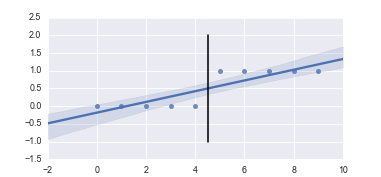

In [3]:
# Plot separation when "clean" data
from scipy import stats

slope, intercept, r, p, _ = stats.linregress(x, y)
print('Slope = {:.3f} (r = {:.3f}, p = {:.5f})'.format(slope, r, p))

ax = sns.regplot(x, y)
x_intersect = (0.5 - intercept)/slope
ax.plot([x_intersect, x_intersect], [-1,2], 'k-')
sns.plt.show()

Slope = 0.047 (r = 0.613, p = 0.04494)


<IPython.core.display.Javascript object>


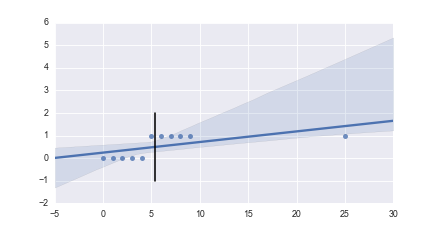

In [4]:
# Plot sepration when outlier
x = np.append(x, [25])
y = np.append(y, [1])
slope, intercept, r, p, _ = stats.linregress(x, y)
print('Slope = {:.3f} (r = {:.3f}, p = {:.5f})'.format(slope, r, p))

ax = sns.regplot(x, y)
x_intersect = (0.5 - intercept)/slope
ax.plot([x_intersect, x_intersect], [-1,2], 'k-')
sns.plt.show()

## Logistic Function

The hypothesis function associated with the Logistic Regression model. 

$$\frac{1}{1+e^{-x}}$$

A sigmoid function is a function characterized by an S shaped curve. Logistic function is a special case of sigmoid function, but often the two terms are used interchangeably.

Statistical approaches tend to mention the logit function (inverse of the sigmoid one) and the concept of odds. [Great article about the connection of the two interpretations](https://sebastianraschka.com/faq/docs/logistic-why-sigmoid.html)

<IPython.core.display.Javascript object>


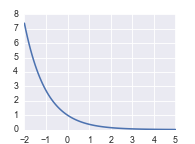

In [18]:
# Exponential
x = np.linspace(-2, 5, 100)
y = np.exp(-x)

ax = plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


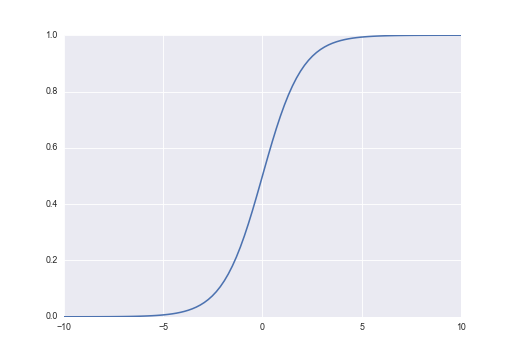

In [19]:
# Sigmoid 
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))

ax = plt.plot(x, y)
plt.show()

# Decision Boundary [TOFIX]

In [44]:
h_0 = lambda x : t_0 + (t_1 * x[0]) + (t_2 * x[1])

<IPython.core.display.Javascript object>


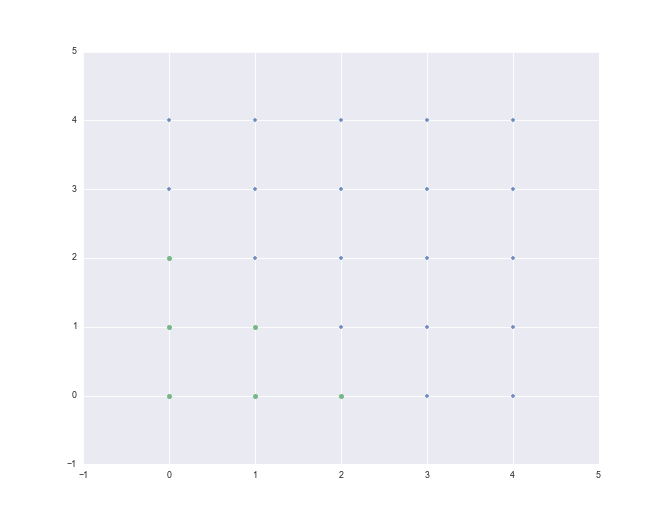

In [46]:
t_0 = -3
t_1 = 1
t_2 = 1
x_1 = np.arange(5)
x_2 = np.arange(5)
res = np.dstack(np.meshgrid(x_1, x_2)).reshape(-1, 2)
s_1 = filter(lambda x : h_0((x[0],x[1]))>=0, res)
s_2 = filter(lambda x : h_0((x[0],x[1]))<0, res)

m = ['+','o']
for i, s in enumerate([s_1, s_2]):
    x_1, x_2 = list(map(np.array, zip(*s)))
    sns.regplot(x_1, x_2, fit_reg=False, marker=m[i])
    sns.plt.show()

# Simulate Data

In [82]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
# Replace label 2 with value 1, so we have only two classes to predict
np.place(Y, Y==2, 1)

In [83]:
df = pd.DataFrame(X, columns=['feat_1', 'feat_2'])
df['class'] = Y
df.head()

,feat_1,feat_2,class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


<IPython.core.display.Javascript object>


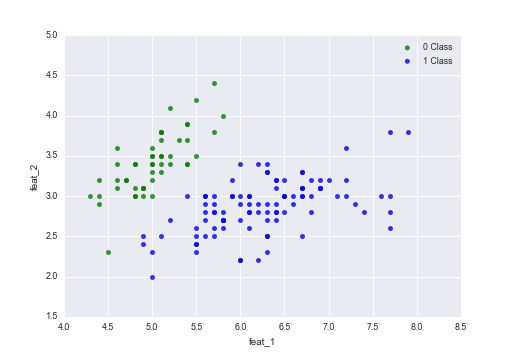

In [84]:
sns.regplot(x='feat_1', y='feat_2', data=df[df['class']==0], color='g', fit_reg=False)
sns.regplot(x='feat_1', y='feat_2', data=df[df['class']==1], color='b', fit_reg=False)
sns.plt.legend(['0 Class', '1 Class'])
sns.plt.show()

# Logistic Regression (Sklearn)

In [20]:
from sklearn import metrics

In [16]:
logreg = linear_model.LogisticRegression(C=1e5)

In [17]:
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = logreg.predict(X)

In [21]:
metrics.accuracy_score(Y, predictions)

1.0

# Gradient Descent

Fit model using gradient descent.

For the cost function we can rely on cross-entropy loss, which for binary cases is:

$$
L(y,\hat{y})\ =\ -y\log {\hat  {y}}-(1-y)\log(1-{\hat  {y}})
$$

[Ref 1](http://aimotion.blogspot.ie/2011/11/machine-learning-with-python-logistic.html)

In [20]:
# Sigmoid function
def sigmoid(X):
    res = 1.0 / (1.0 + np.exp(-1.0 * X))
    return res

In [51]:
# Cost for single prediction
def compute_cost(X, y_true, theta):
    m = len(y_true)
    
    y_pred = sigmoid(X.dot(theta).flatten())
    
    # Simplified
    #if y_true == 1:
    #    return -log(y_pred)
    #else:
    #    return -log(1 - y_pred)
    
    # One liner
    cost = ((-y_true.T.dot(np.log(y_pred)) - 
             (1-y_true).T.dot(np.log(1-y_pred))) /(1.0*m))
    return cost

In [52]:
# single gradient descent step
def gradient_descent_step(X, y, theta, alpha):
    m = len(y)
    # compute predictions
    pred = sigmoid(X.dot(theta).flatten())
    
    # get error
    errors = -np.sum((y-pred)*X.T, axis=1).reshape(3,1)
    
    theta -= alpha * (errors/m)
    
    return theta

In [53]:
# run an entire training cycle
def train(X, y, alpha, iters):
    cost_history = np.zeros(shape=(iters, 1))
    theta_history = []
    
    # our parameters are slope and intercepts (bias)
    theta = np.random.randn(3, 1)
    for i in range(iters):
        theta = gradient_descent_step(X, y, theta, alpha)
        
        cost_history[i, 0] = compute_cost(X, y, theta)
        theta_history.append(theta.copy())
    
    return theta_history, cost_history

In [89]:
# Parameter learning

# input data including bias
iris = datasets.load_iris()
X = iris.data[:, :3]
X[:, 2] = 1
y = iris.target
# Replace label 2 with value 1, so we have only two classes to predict
np.place(y, y==2, 1)

print(X.shape)
print(y.shape)

(150, 3)
(150,)


In [55]:
alpha = 0.01
epochs = 1000
theta_history, cost_history = train(X, y, alpha, epochs)

<IPython.core.display.Javascript object>


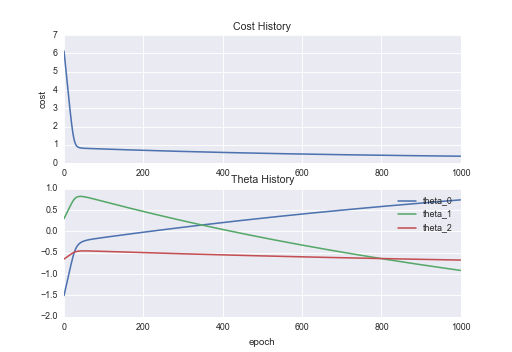

In [57]:
# Plot history
fig, axes = plt.subplots(2, 1)
# plot cost
axes[0].set_title('Cost History')
axes[0].plot(cost_history.reshape(-1))
axes[0].set_ylabel("cost")
# plot theta
axes[1].set_title('Theta History')
for t_idx in range(len(theta_history[0])):
    axes[1].plot([t[t_idx] for t in theta_history], label='theta_{}'.format(t_idx))
axes[1].set_xlabel("epoch")
plt.legend()
plt.show()

## Training Animation

<IPython.core.display.Javascript object>


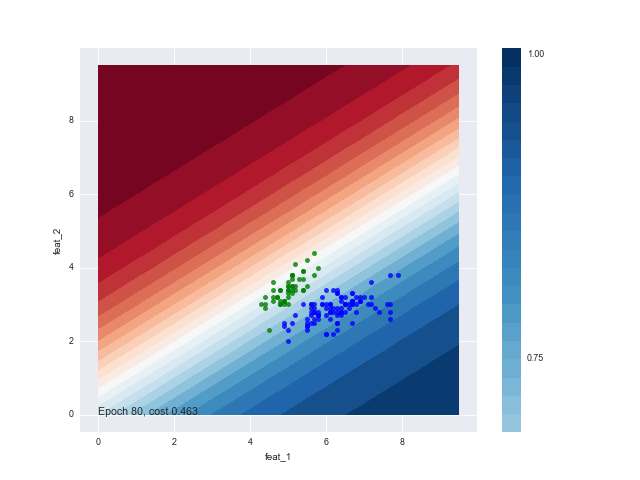

In [95]:
alpha = 0.01
epochs = 100

# Plot SGD animation
fig, ax = sns.plt.subplots(figsize=(8, 6))
xx, yy = np.mgrid[0:10:.5, 0:10:.5]
grid = np.c_[xx.ravel(), yy.ravel()]
X_grid = np.ones(shape=(len(xx)*len(yy), 3))
X_grid[:, :2] = grid
theta = np.random.randn(3, 1)
pred = sigmoid(X_grid.dot(theta).flatten()).reshape(xx.shape)
contour = ax.contourf(xx, yy, pred, 25, cmap="RdBu",
                      vmin=0, vmax=1)
sns.regplot(x='feat_1', y='feat_2', data=df[df['class']==0], color='g', fit_reg=False)
sns.regplot(x='feat_1', y='feat_2', data=df[df['class']==1], color='b', fit_reg=False)
ax_c = fig.colorbar(contour)
ax_c.set_ticks([0, .25, .5, .75, 1])
epoch_text = ax.text(0, 0, "Epoch 0")

def animate(i):
    global X, y, theta, alpha, df
    theta = gradient_descent_step(X, y, theta, alpha)

    pred = sigmoid(X_grid.dot(theta).flatten()).reshape(xx.shape)
    contour = ax.contourf(xx, yy, pred, 25, cmap="RdBu",
                      vmin=0, vmax=1)
    cost = compute_cost(X, y, theta)
    epoch_text.set_text("Epoch {}, cost {:.3f}".format(i, cost))
    sns.regplot(x='feat_1', y='feat_2', data=df[df['class']==0], color='g', fit_reg=False)
    sns.regplot(x='feat_1', y='feat_2', data=df[df['class']==1], color='b', fit_reg=False)
    return epoch_text,

ani = animation.FuncAnimation(fig, animate, epochs, interval=1, repeat=False)